In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

print(most_recent_date)

2017-08-23


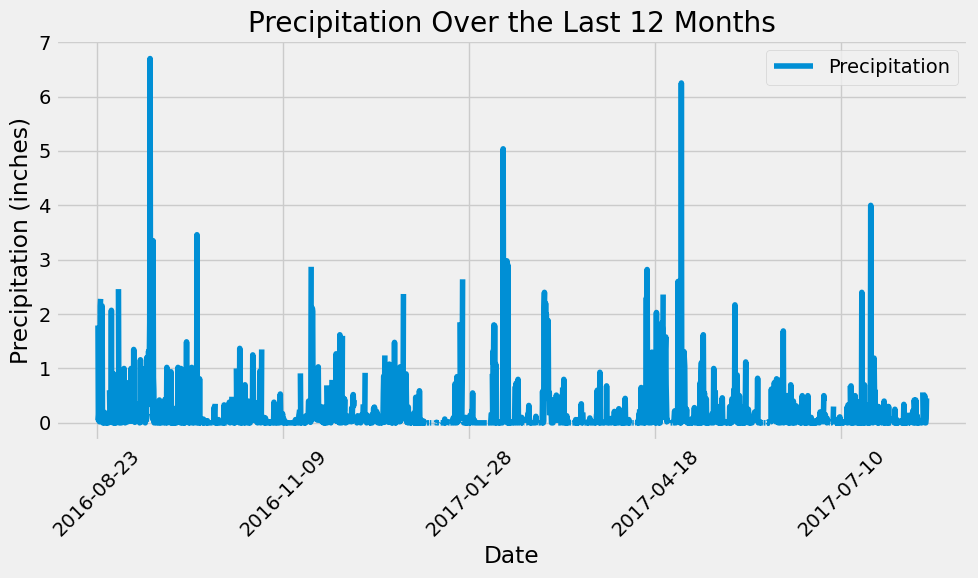

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
                        filter(measurement.date >= one_year.strftime('%Y-%m-%d')).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
sort_df = query_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = sort_df.describe()

summary_stats.head()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(station.station))).scalar()

total_stations

9

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_activity = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()

# List the stations and their counts in descending order.
for station, count in station_activity:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = station_activity[0][0]

temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_id).all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

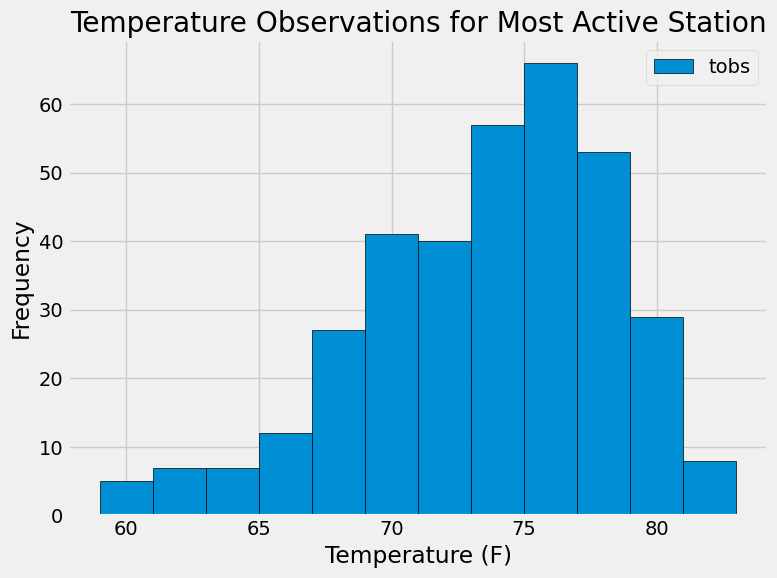

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).\
            filter(measurement.station == most_active_id).\
            filter(measurement.date >= one_year.strftime('%Y-%m-%d')).all()

temp_df = pd.DataFrame(temp_data, columns = ['Temperature'])

plt.figure(figsize=(8, 6))
plt.hist(temp_df['Temperature'], bins=12, edgecolor='black')
plt.title('Temperature Observations for Most Active Station')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')
plt.tight_layout()
plt.show()

# Close Session

In [39]:
# Close Session
session.close()